# Title
### Group 11 Project Proposal
##### Group Members: 
Jialu Jin   24403594
<br>Aditya Goel
<br>Yirui Wang 27719509
<br>Aaron Cui 94952777

# Introduction


# Preliminary Results

In [7]:
library(infer)
library(repr)
library(tidyverse)
library(readxl)
library(digest)
library(dplyr)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 6)

Demonstrate that the dataset can be read from the web into R.
- We downloaded the dataset from the wesb and put it in our repository.

In [8]:
Suicide_p <- read.csv("master.csv", header=T)
head(Suicide_p)

,country,year,sex,age,suicides_no,population,suicides.100k.pop,country.year,HDI.for.year,gdp_for_year....,gdp_per_capita....,generation
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>
1,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NA,"2,156,624,900",796,Generation X
2,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NA,"2,156,624,900",796,Silent
3,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NA,"2,156,624,900",796,Generation X
4,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NA,"2,156,624,900",796,G.I. Generation
5,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NA,"2,156,624,900",796,Boomers
6,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NA,"2,156,624,900",796,G.I. Generation


Clean and wrangle the data into a tidy format.
- We cleaned and wrangled the data by filtering only Canada and selecting sex, year and suicides.100k.pop columns.

In [17]:
suicide_sample <- Suicide_p %>%
                  filter(country %in% c("Canada")) %>%
                  select(sex, year, suicides.100k.pop)
suicide_sample

sex,year,suicides.100k.pop
<chr>,<int>,<dbl>
male,1985,28.45
male,1985,27.27
male,1985,27.00
⋮,⋮,⋮
female,2013,4.61
female,2013,1.10
male,2013,0.78


Plot the relevant raw data, tailoring your plot in a way that addresses your question.
- We plot a boxplot of number of suicides per 100k population for different sex.
- We also plot a histogram of Sample distribution of number of suicides per 100k population in Canada for 2 sex groups.
- From the boxplot, we can see that the boxplots of two genders don't even overlap. Also, from the histogram, the sample distribution varies a lot for different genders. So we think this might indicate that there is a significant difference of the mean number of suicides per 100k population for two genders.

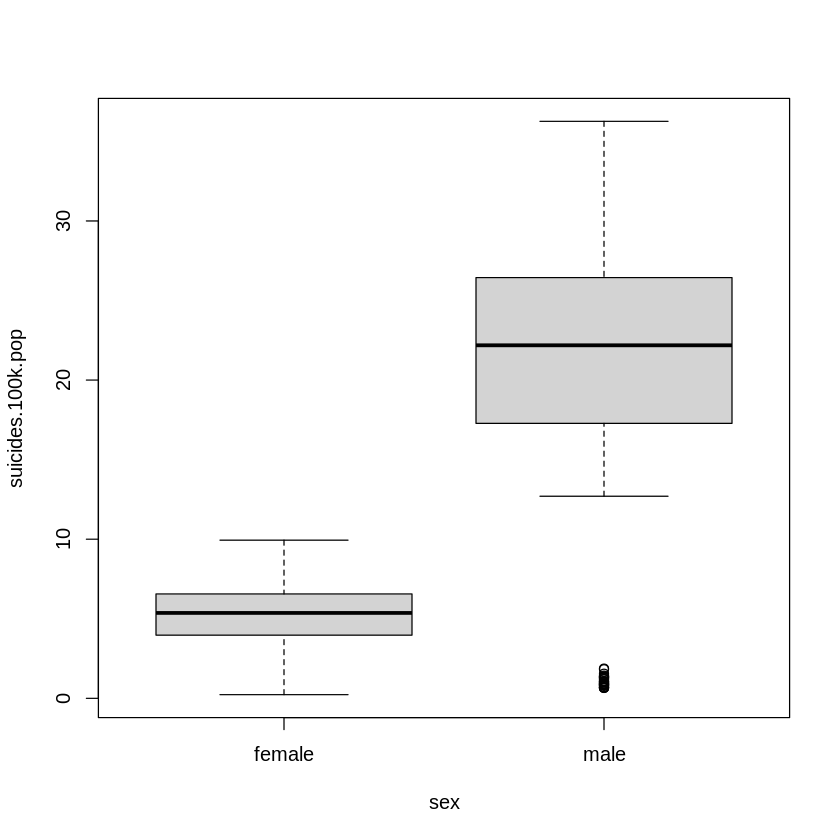

In [20]:
boxplot(suicides.100k.pop ~ sex, data = suicide_sample)

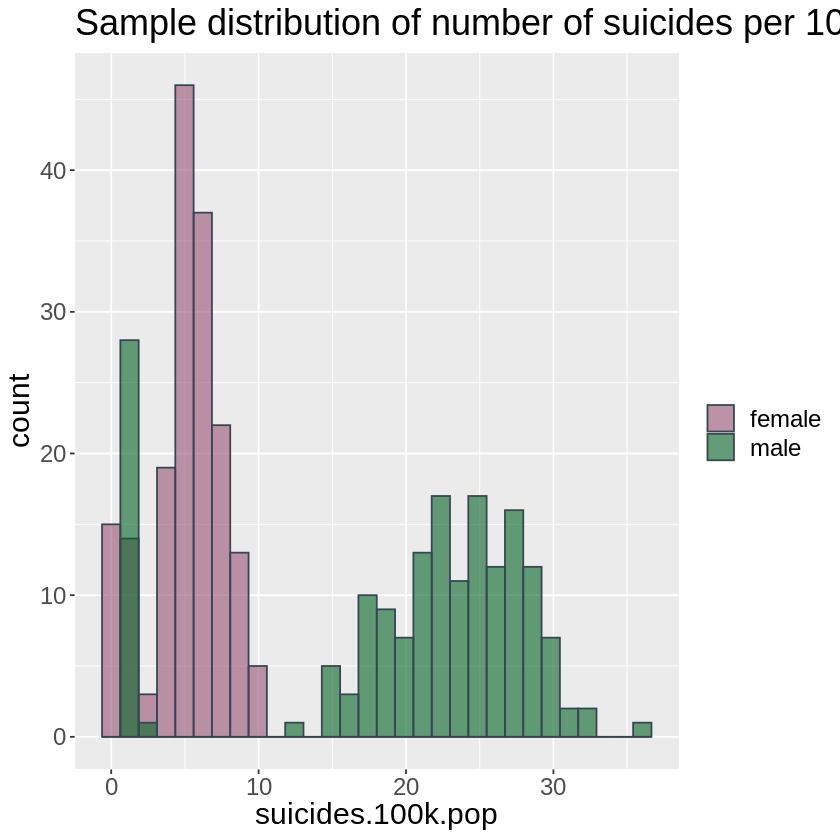

In [21]:
histogram <- suicide_sample %>%
    ggplot(aes(x = suicides.100k.pop, fill = sex)) +
    geom_histogram(bins=30, color="#374652", alpha=0.6, position = 'identity') +
    scale_fill_manual(values=c("#985473", "#036425")) +
    ggtitle("Sample distribution of number of suicides per 100k population in Canada for 2 sex groups")+
    labs(fill="") +
    theme(text = element_text(size = 18))
histogram

Compute estimates of the parameter you identified across your groups. Present this in a table. If relevant, include these estimates in your plot.
- The following is the summary statistics(sample means of number of suicides per 100k population for female and male respectively)

In [16]:
summary <- suicide_sample%>%
        group_by(sex) %>%
        summarize(mean = mean(suicides.100k.pop))
summary

sex,mean
<chr>,<dbl>
female,5.113161
male,19.822011


# Methods: Plan

# References

https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016